In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 15 08:29:53 2021

@author: Arbo
"""
import os
import pandas as pd
code_dir = os.getcwd()
parent_dir = os.path.dirname(code_dir)
data_dir = os.path.join(parent_dir,"Data")
tweet_dir = os.path.join(parent_dir,"tweets_archive")

wxevents= ["tornado","blizzard","snow", "ice storm","sleet","thunderstorm","hail","freeze","frost","extreme cold","lightning",    "winds"       
"gale","storm"]
movement=["landslide" , "tsunami" , "tidal wave" , "earthquake" , "eruption" , 
          "volcano" , "lava" , "lahar" , "avalanche" , "mudslide" , "sinkhole"]
troplist=["typhoon" ,"cyclone","hurricane", "tropical storm","storm surge"]
flist= ["fire", "forest fire", "wildfire", "bushfire", "extreme heat", "record heat", "heatwave" , "heat wave" ]
floods = ["flood","flooded","flooding"]

In [9]:
tweet_dir



'/Volumes/Elements/DataScience/dsa/capstone/tweets_archive'

In [10]:
dfs=[]
for table in os.listdir(os.path.join(tweet_dir)):
    if table.startswith("proc"):
        tempdf = pd.read_csv(os.path.join(tweet_dir,table), engine = 'python', )
        tempdf['isDate'] = tempdf.Datetime.str.startswith('2')
        tempdf = tempdf[tempdf['isDate'] == True]
        try:
            tempdf = tempdf.drop(columns = ['TweetLink','isDate'])
        except:
            tempdf = tempdf
        dfs.append(tempdf)

In [11]:
dfs2=[]
for table in os.listdir(os.path.join(tweet_dir)):
    if table.startswith("result"):
        print(table)
        tempdf = pd.read_csv(os.path.join(tweet_dir,table), engine = 'python', )
        tempdf['isDate'] = tempdf.Datetime.str.startswith('2')
        tempdf = tempdf[tempdf['isDate'] == True]
        try:
            tempdf = tempdf.drop(columns = ['TweetLink','isDate'])
        except:
            tempdf = tempdf.drop(columns = ['isDate'])
        dfs2.append(tempdf)

result_20210601_20210602.csv
result_20210602_20210603.csv
result_20210603_20210604.csv
result_20210604_20210605.csv
result_20210605_20210606.csv
result_20210606_20210607.csv
result_20210607_20210608.csv
result_20210608_20210609.csv
result_20210609_20210610.csv
result_20210610_20210611.csv
result_20210611_20210612.csv
result_20210612_20210613.csv
result_20210613_20210614.csv
result_20210614_20210615.csv
result_20210615_20210616.csv
result_20210616_20210617.csv
result_20210617_20210618.csv
result_20210618_20210619.csv
result_20210619_20210620.csv
result_20210620_20210621.csv
result_20210621_20210622.csv
result_20210622_20210623.csv
result_20210623_20210624.csv
result_20210624_20210625.csv
result_20210625_20210626.csv
result_20210626_20210627.csv
result_20210627_20210628.csv
result_20210628_20210629.csv
result_20210629_20210630.csv
result_20210630_20210701.csv
result_20210702_20210703.csv
result_20210703_20210704.csv
result_20210704_20210705.csv
result_20210711_20210712.csv
result_2021071

In [4]:
len(dfs2)

0

In [12]:
allproc = pd.concat(dfs)
print("There are {} processed Tweets".format(len(allproc)))
allproc= allproc.drop_duplicates()
allproc = allproc.sort_values(by=['Datetime']).reset_index(drop=True)
allproc['Datetime'] =  pd.to_datetime(allproc['Datetime'],infer_datetime_format=True)
allproc = allproc.drop(columns = ['isDate'])
print("After removing duplicates there are {} processed Tweets".format(len(allproc)))


There are 3186314 processed Tweets
After removing duplicates there are 3186314 processed Tweets


In [13]:
allresult = pd.concat(dfs2)
print("There are {} processed Tweets".format(len(allresult)))
allresult= allresult.drop_duplicates()
allresult = allresult.sort_values(by=['Datetime']).reset_index(drop=True)
allresult['Datetime'] =  pd.to_datetime(allresult['Datetime'],infer_datetime_format=True)
print("After removing duplicates there are {} processed Tweets".format(len(allresult)))

There are 3122479 processed Tweets
After removing duplicates there are 3122479 processed Tweets


In [15]:
allproc2 = allproc.set_index('Datetime').groupby(pd.Grouper(freq='D')).count()
allresult2 = allresult[allresult['target']==0].set_index('Datetime').groupby(pd.Grouper(freq='D')).count()

In [347]:
allresult[(allresult['target']==0)].sample(n=100, random_state = 42)[50:100]

,Datetime,TweetId,Text,ptext,target,Unnamed: 0,word,spans,country_predicted,country_conf,0,admin1,country_code3,feature_class,feature_code,geonameid,lat,lon,place_name
1648313,2021-07-09 04:14:14+00:00,1413350761350766593,@Old_Rookie_ Why is that person even attemptin...,person even attempting walk flood 🤔,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1293017,2021-06-30 21:52:36+00:00,1410355616053272583,i’m not in george’s alt so i’m waiting for the...,’ george ’ alt ’ waiting photo flood tl actual...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2825002,2021-07-27 22:13:34+00:00,1420145365756616716,Thanks @StarCraft @Blizzard_Ent 🙏 . Some new m...,thanks 🙏 new map nice also dbut really thanks ...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884630,2021-06-20 17:22:56+00:00,1406663874284113920,@RConfuser @GuidoDisalle @CMYKRevolution @Know...,never freeze data want option change thing sel...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2746456,2021-07-26 20:13:33+00:00,1419752771339931648,Severe storms continue their move southward th...,severe storm continue move southward amherst c...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1120315,2021-06-27 00:09:34+00:00,1408940532827525120,I wanna cry cause this Vancouver heatwave is w...,wan na cry cause vancouver heatwave warming sk...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1110718,2021-06-26 20:31:56+00:00,1408885762293071872,@64ds_ @ZhongChi_png river flood,river flood,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382448,2021-06-06 01:39:03+00:00,1401352907316891656,"@__eshani Hey Eshani, thank you for this. I wa...",hey eshani thank searching imposter syndrome m...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1401743,2021-07-04 19:53:42+00:00,1411775242624634880,@shminsington You did a Robert frost on a frid...,robert frost fridge door still ’ understand,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497546,2021-06-09 06:33:15+00:00,1402514107870461956,@julianhosp @nayibbukele They are even looking...,even looking mining volcano thermalenergy 👍🚀,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [285]:
test.sort_values(by=['TweetId'])

,Datetime,TweetId,Text,ptext,hour,date
Datetime,,,,,,
2021-06-20 00:00:00+00:00,26145,26145,26145,26112,26145,26145
2021-06-12 00:00:00+00:00,27523,27523,27523,27490,27523,27523
2021-06-06 00:00:00+00:00,27696,27696,27696,27663,27696,27696
2021-06-13 00:00:00+00:00,29752,29752,29752,29727,29752,29752
2021-06-23 00:00:00+00:00,30338,30338,30338,30312,30338,30338
...,...,...,...,...,...,...
2021-07-23 00:00:00+00:00,80414,80414,80414,80219,80414,80414
2021-06-04 00:00:00+00:00,82345,82345,82345,82278,82345,82345
2021-07-28 00:00:00+00:00,85029,85029,85029,84759,85029,85029


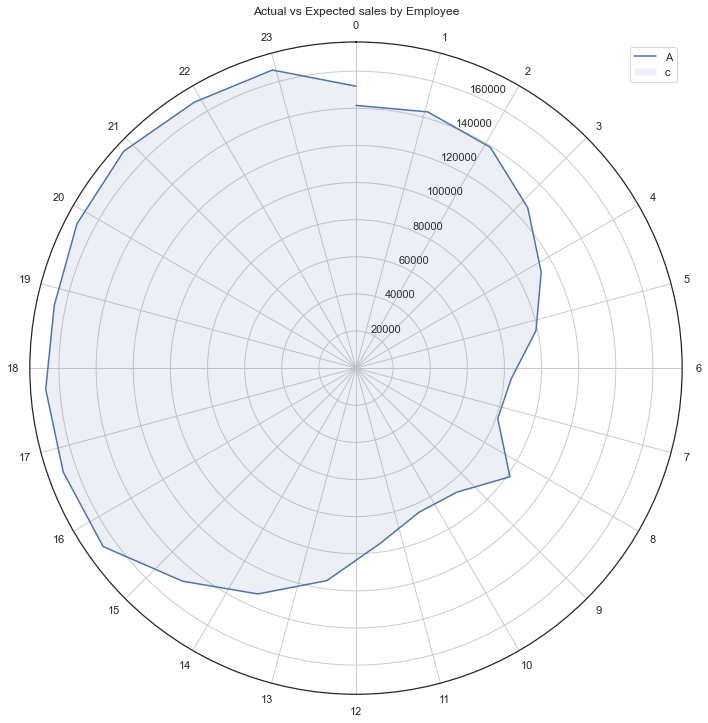

In [272]:
import matplotlib.pyplot as plt
import numpy as np

employee = test4.axes[0]
actual = test4.TweetId

	
# Initialing the spiderplot by
# setting figure size and polar
# projection
plt.figure(figsize =(20, 12))
# plt.subplot(polar = True)
ax = plt.subplot(projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_zero_location("N")
theta = np.linspace(0, 2 * np.pi, len(actual))

# Arranging the grid into number
# of sales into equal parts in
# degrees
lines, labels = plt.thetagrids(range(0, 360, int(360/len(employee))),(employee))

# Plot actual sales graph
plt.plot(theta, actual)
plt.fill(theta, actual, 'b', alpha = 0.1)

# Add legend and title for the plot
plt.legend(labels =('Actual'),loc = 1)
plt.title("Actual vs Expected sales by Employee")

# Display the plot on the screen
plt.show()


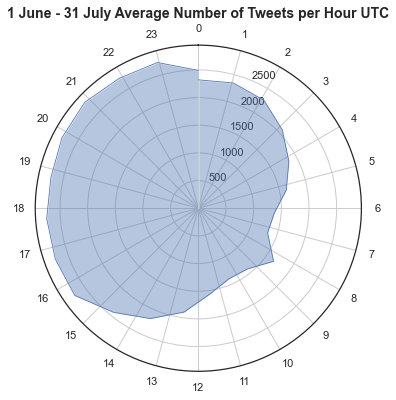

In [281]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize =(10, 6))
ax = plt.subplot(projection='polar')

ax.set_theta_direction(-1)
ax.set_theta_zero_location("N")

t = test4.axes[0]
y = test4['TweetId']/61
tnorm = (t-t.min())/(t.max()-t.min())*2.*np.pi
ax.fill_between(tnorm,y ,0, alpha=0.4)
ax.plot(tnorm,y , linewidth=0.8)
ax.set_title("1 June - 31 July Average Number of Tweets per Hour UTC",fontsize=14,fontweight='bold')
plt.thetagrids(range(0, 360, 15),(range(0,24,1)))
# plt.rgrids(range(0, max(test4['TweetId']), 5))

plt.show()

In [288]:
test4["d"] = test4['TweetId']/61

In [290]:
test4.sort_values(by=['d'])

,Datetime,TweetId,Text,ptext,date,d
hour,,,,,,
7,81085,81085,81085,80902,81085,1329.262295
6,83859,83859,83859,83665,83859,1374.737705
10,84802,84802,84802,84618,84802,1390.196721
9,86158,86158,86158,85934,86158,1412.426230
11,95372,95372,95372,95180,95372,1563.475410
5,99064,99064,99064,98830,99064,1624.000000
8,101536,101536,101536,101377,101536,1664.524590
4,112425,112425,112425,112209,112425,1843.032787
12,115604,115604,115604,115402,115604,1895.147541


Text(0.5, 1.0, 'Count of Daily Collected Tweets')

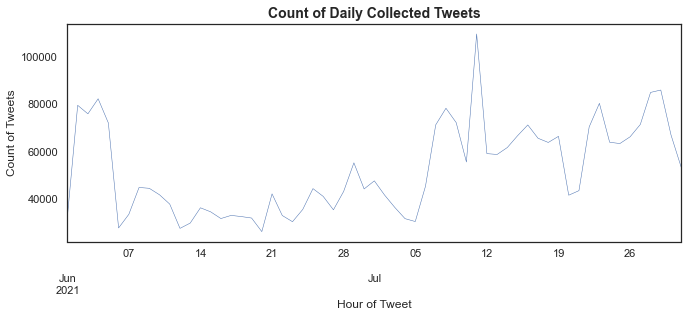

In [244]:
test4['TweetId'].plot(linewidth=0.5);
plt.xlabel("Hour of Tweet")
plt.ylabel("Count of Tweets")
plt.title("Count of Daily Collected Tweets",fontsize=14,fontweight='bold')

In [185]:
test2['time'] = test2['hour'].dt.hour

,TweetId,Text,ptext,hour
Datetime,,,,
2021-06-01 00:00:00+00:00,1291,1291,1290,0
2021-06-01 01:00:00+00:00,1420,1420,1416,1
2021-06-01 02:00:00+00:00,1249,1249,1248,2
2021-06-01 03:00:00+00:00,1161,1161,1160,3
2021-06-01 04:00:00+00:00,1178,1178,1178,4
...,...,...,...,...
2021-07-31 19:00:00+00:00,2749,2749,2740,19
2021-07-31 20:00:00+00:00,2666,2666,2653,20
2021-07-31 21:00:00+00:00,2820,2820,2803,21


In [156]:
test2['TweetId'].describe()

count     1464.000000
mean      2176.443989
std       1140.560645
min          0.000000
25%       1390.500000
50%       1889.000000
75%       2793.000000
max      11597.000000
Name: TweetId, dtype: float64

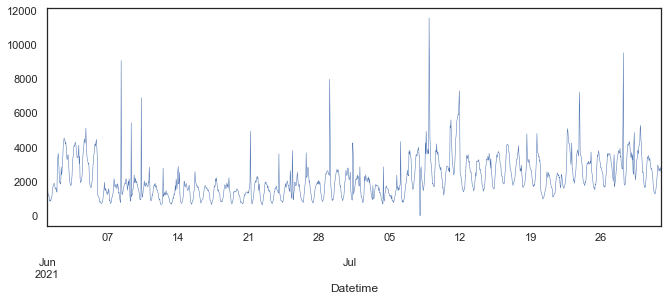

In [155]:
test2['TweetId'].plot(linewidth=0.5);

In [351]:
test.head()

,Datetime,TweetId,Text,ptext,hour,date
Datetime,,,,,,
2021-06-01 00:00:00+00:00,32713,32713,32713,32684,32713,32713
2021-06-02 00:00:00+00:00,79577,79577,79577,79477,79577,79577
2021-06-03 00:00:00+00:00,75969,75969,75969,75939,75969,75969
2021-06-04 00:00:00+00:00,82345,82345,82345,82278,82345,82345
2021-06-05 00:00:00+00:00,72092,72092,72092,72057,72092,72092


In [352]:
allresult2.head()

,Datetime,TweetId,Text,ptext,target,Unnamed: 0,word,spans,country_predicted,country_conf,0,admin1,country_code3,feature_class,feature_code,geonameid,lat,lon,place_name
Datetime,,,,,,,,,,,,,,,,,,,
2021-06-01 00:00:00+00:00,70519,70519,70519,70484,51386,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-06-02 00:00:00+00:00,79577,79577,79577,79477,57966,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-06-03 00:00:00+00:00,75969,75969,75969,75939,54436,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-06-04 00:00:00+00:00,82345,82345,82345,82278,55868,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-06-05 00:00:00+00:00,72092,72092,72092,72057,49597,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
concatenated = pd.concat([allproc2.assign(dataset='All Tweets'), allresult2.assign(dataset='Informative Tweets')])

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


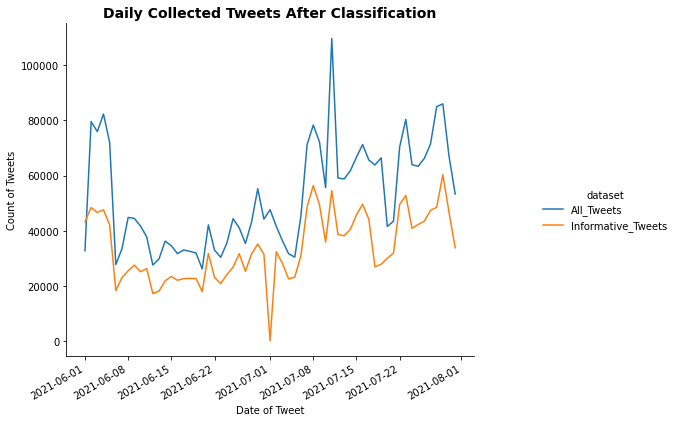

In [26]:
g = sns.relplot(x="Datetime", y="TweetId",kind="line",
             data=concatenated,
               hue='dataset')
plt.xlabel('Date of Tweet')
plt.ylabel("Count of Tweets")
plt.title("Daily Collected Tweets After Classification",fontsize=14,fontweight='bold')

g.fig.set_size_inches(10,6)
g.fig.autofmt_xdate()

In [19]:
g = sns.relplot(x="Datetime", y="TweetId",kind="line",
             data=allresult2)
plt.xlabel('Date of Tweet')
plt.ylabel("Count of Tweets")
plt.title("Count of Daily Informative Tweets",fontsize=14,fontweight='bold')

g.fig.set_size_inches(10,6)
g.fig.autofmt_xdate()

NameError: name 'sns' is not defined

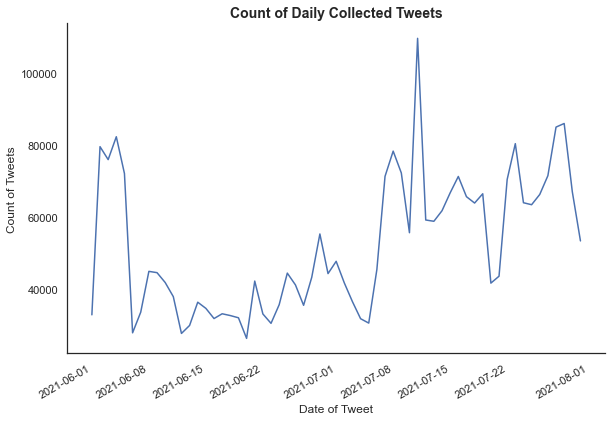

In [221]:
g = sns.relplot(x="Datetime", y="TweetId",kind="line",
             data=test)
plt.xlabel('Date of Tweet')
plt.ylabel("Count of Tweets")
plt.title("Count of Daily Collected Tweets",fontsize=14,fontweight='bold')

g.fig.set_size_inches(10,6)
g.fig.autofmt_xdate()

In [3]:
alltweet = pd.concat(dfs)
alltweet = alltweet.sort_values(by=['Datetime']).reset_index(drop=True)
alltweet = alltweet.drop([646857,10454])
alltweet = alltweet.astype({'target': 'float32'})
alltweet = alltweet.astype({'lat': 'float64'})
alltweet = alltweet.astype({'country_conf': 'float64'})
alltweet= alltweet.drop_duplicates()
alltweet = alltweet.sort_values(by=['Datetime']).reset_index(drop=True)

In [4]:
alltweet['flood']=alltweet.ptext.str.contains('|'.join(floods))
alltweet['tropical']=alltweet.ptext.str.contains('|'.join(troplist))
alltweet['severeweather']=alltweet.ptext.str.contains('|'.join(wxevents))
alltweet['geomovement']=alltweet.ptext.str.contains('|'.join(movement))
alltweet['fire']=alltweet.ptext.str.contains('|'.join(flist))


In [5]:
tweet_dir = os.path.join(parent_dir,"TweetMap")

In [6]:
alltweet.to_csv(os.path.join(tweet_dir,"alltweet.csv"), index = False)
alltweet.to_csv(os.path.join(tweet_dir,"alltweet_i.csv"), index = True)

In [29]:
locations = alltweet[['country_code3','admin1','place_name', 'geonameid']]

In [30]:
admin_ones = locations.drop_duplicates(['country_code3','admin1'])
admin_ones = admin_ones[['country_code3','admin1']]

In [31]:
admin_ones = admin_ones.sort_values(by=['country_code3', 'admin1'])

In [32]:
admin_ones.to_csv(os.path.join(tweet_dir,"Admin_ones.csv"), index = False)

In [33]:
geonames = locations.drop_duplicates('geonameid')
geonames = geonames[['geonameid','place_name','country_code3','admin1']]

In [34]:
geonames = geonames.sort_values(by=['country_code3','admin1','place_name'])

In [35]:
geonames.to_csv(os.path.join(tweet_dir,"geonames_ones.csv"), index = False)

In [36]:
countries = pd.read_csv(os.path.join(tweet_dir,"Countries - Countries.csv"))

In [37]:
countries= countries.sort_values(by='Country')

In [38]:
countries.to_csv(os.path.join(tweet_dir,"Countries - Countries.csv"), index = False)